Lasso RMSE: 4.93
Lasso R^2: 0.67


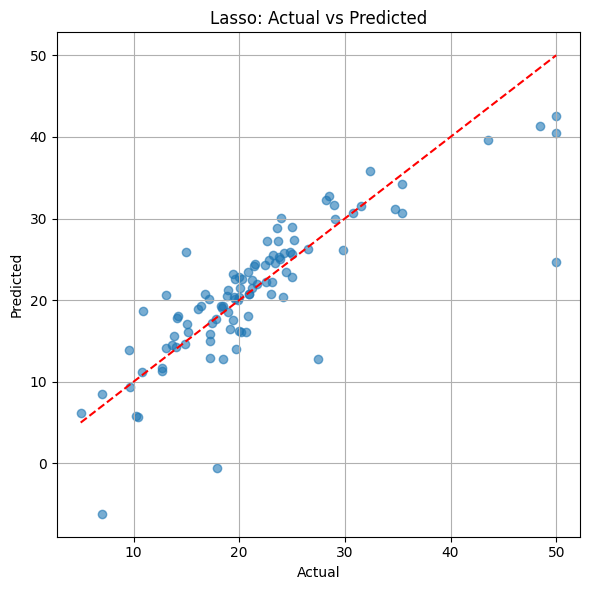

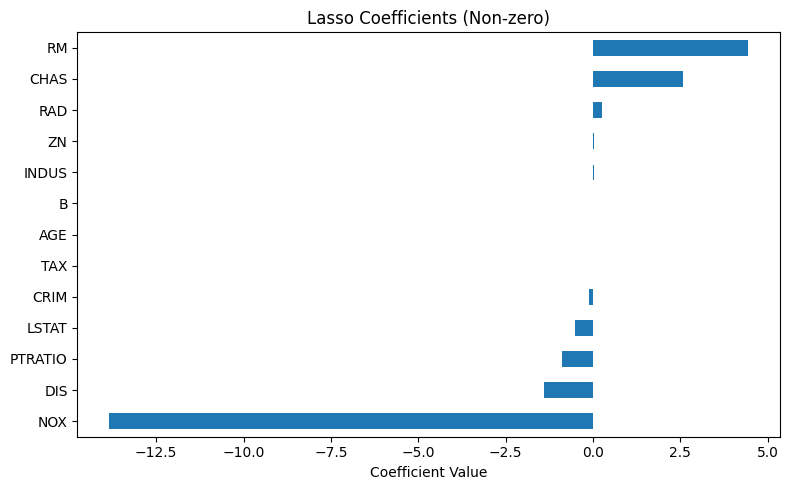

In [1]:
# 04c_post_model_analysis_lasso.ipynb

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load test data
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# Load Lasso model
with open("lasso_model.pkl", "rb") as f:
    lasso = pickle.load(f)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Evaluate
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso RMSE: {rmse_lasso:.2f}")
print(f"Lasso R^2: {r2_lasso:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Lasso: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Coefficients
coef_lasso = pd.Series(lasso.coef_, index=X_test.columns)
coef_lasso = coef_lasso[coef_lasso != 0]  # Only non-zero features

plt.figure(figsize=(8, 5))
coef_lasso.sort_values().plot(kind='barh')
plt.title("Lasso Coefficients (Non-zero)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()